In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
df_comp = pd.read_csv("comp.csv")
df_comp = df_comp.sort_values(by=['bin', 'model'])
df_comp.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,model_id,bin,model,display_name
11520,2024-05-18 09:17:53.964,game_episodes,2,170,1,170,1933.0,2023,61.303030,367,900,False,NaN,0.02,B2-long_800000_13_target_net,8.0,B2,8K
11521,2024-05-18 09:17:55.386,game_episodes,2,406,2,236,2367.0,2470,52.553191,353,1700,False,NaN,0.02,B2-long_800000_13_target_net,8.0,B2,8K
11522,2024-05-18 09:17:57.292,game_episodes,2,722,3,316,3058.0,3161,50.174603,337,1000,True,NaN,0.02,B2-long_800000_13_target_net,8.0,B2,8K
11523,2024-05-18 09:17:58.709,game_episodes,2,954,4,232,2369.0,2470,53.695652,354,800,False,NaN,0.02,B2-long_800000_13_target_net,8.0,B2,8K
11524,2024-05-18 09:18:00.602,game_episodes,2,1268,5,314,3059.0,3161,50.983871,338,600,True,NaN,0.02,B2-long_800000_13_target_net,8.0,B2,8K


In [185]:
df_B1 = df_comp[df_comp['model'] == 'B1'].sort_values(by='bin')
df_B2 = df_comp[df_comp['model'] == 'B2'].sort_values(by='bin')
df_T1 = df_comp[df_comp['model'] == 'T1 discr ni'].sort_values(by='bin')

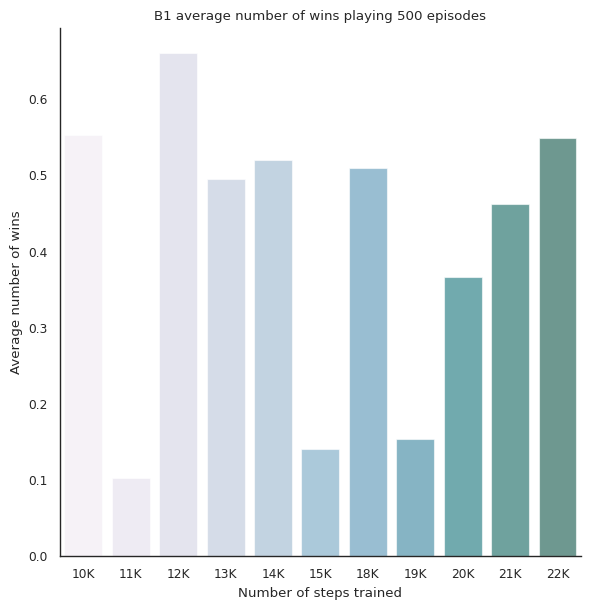

In [186]:
sns.set_style("white")
sns.catplot(data=df_B1, kind="bar", x="display_name", y="flag", errorbar=None, alpha=.6, hue='display_name', palette='PuBuGn', height=6).set(title="B1 average number of wins playing 500 episodes", xlabel="Number of steps trained", ylabel="Average number of wins")

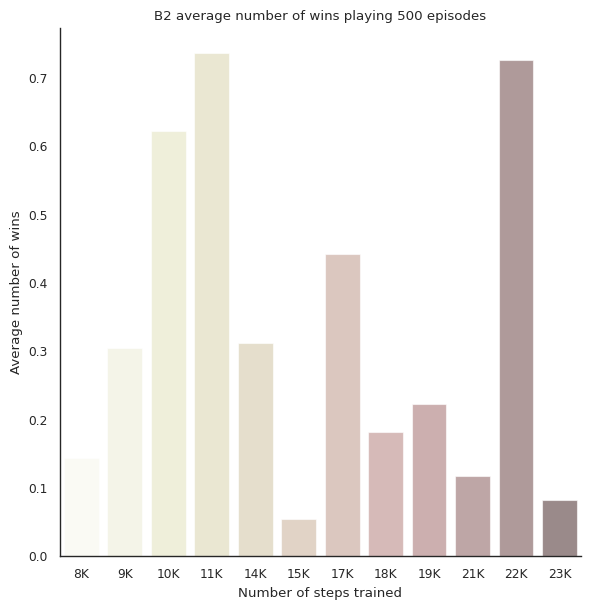

In [187]:
sns.set_style("white")
sns.catplot(data=df_B2, kind="bar", x="display_name", y="flag", errorbar=None, alpha=.6, hue='display_name', palette='pink_r', height=6).set(title="B2 average number of wins playing 500 episodes", xlabel="Number of steps trained", ylabel="Average number of wins")

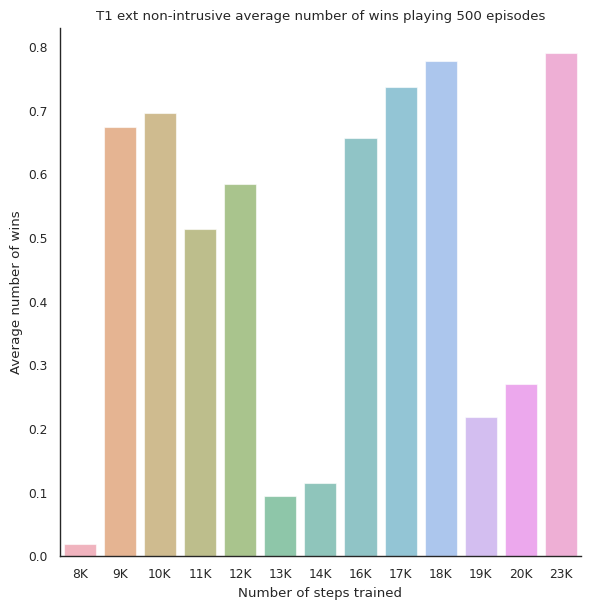

In [188]:
sns.set_style("white")
sns.catplot(data=df_T1, kind="bar", x="display_name", y="flag", errorbar=None, alpha=.6, hue='display_name', height=6).set(title="T1 ext non-intrusive average number of wins playing 500 episodes", xlabel="Number of steps trained", ylabel="Average number of wins")

[Text(0.5, 1.0, 'B1 model performance playing 500 episodes'),
 Text(0.5, 0, 'reward'),
 Text(0, 0.5, 'number of steps trained')]

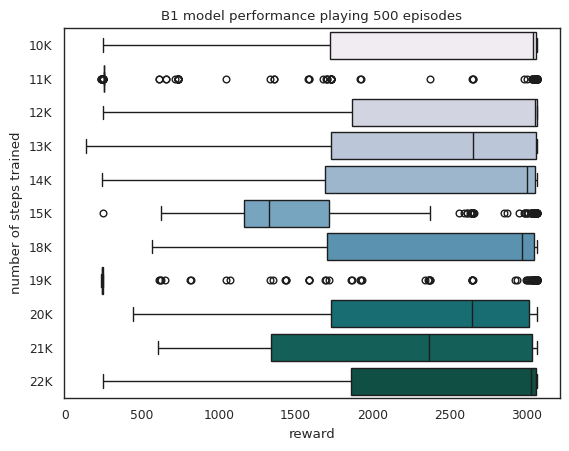

In [189]:
sns.set_style("white")
sns.set_palette(palette='PuBuGn', desat=0.9, n_colors=11)
sns.boxplot(x ="reward", y="display_name", data = df_B1, hue="display_name", legend=False).set(title='B1 model performance playing 500 episodes', xlabel="reward", ylabel="number of steps trained")

[Text(0.5, 1.0, 'B2 model performance playing 500 episodes'),
 Text(0.5, 0, 'reward'),
 Text(0, 0.5, 'number of steps trained')]

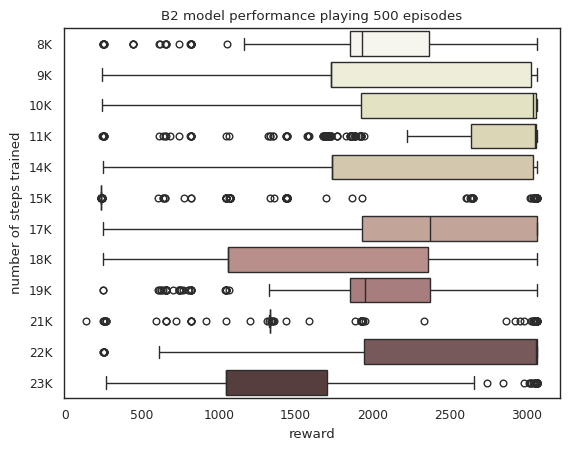

In [190]:
sns.set_style("white")
sns.set_palette(palette='pink_r', desat=0.9, n_colors=12)
sns.boxplot(x ="reward", y="display_name", data = df_B2, hue="display_name", legend=False).set(title='B2 model performance playing 500 episodes', xlabel="reward", ylabel="number of steps trained")

[Text(0.5, 1.0, 'T1 ext non-intrusive model performance playing 500 episodes'),
 Text(0.5, 0, 'reward'),
 Text(0, 0.5, 'number of steps trained')]

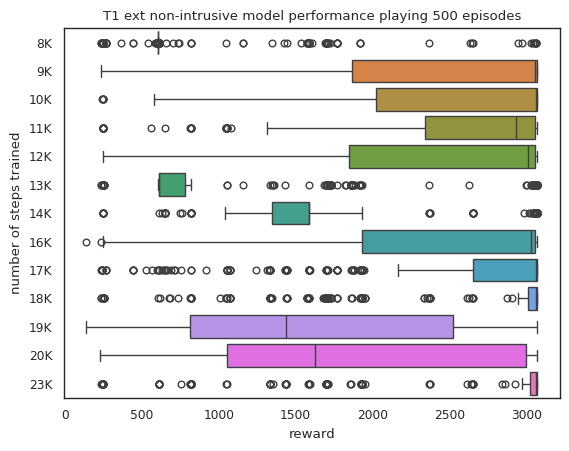

In [181]:
sns.set_style("white")
sns.boxplot(x ="reward", y="display_name", data = df_T1, hue="display_name", legend=False).set(title='T1 ext non-intrusive model performance playing 500 episodes', xlabel="reward", ylabel="number of steps trained")

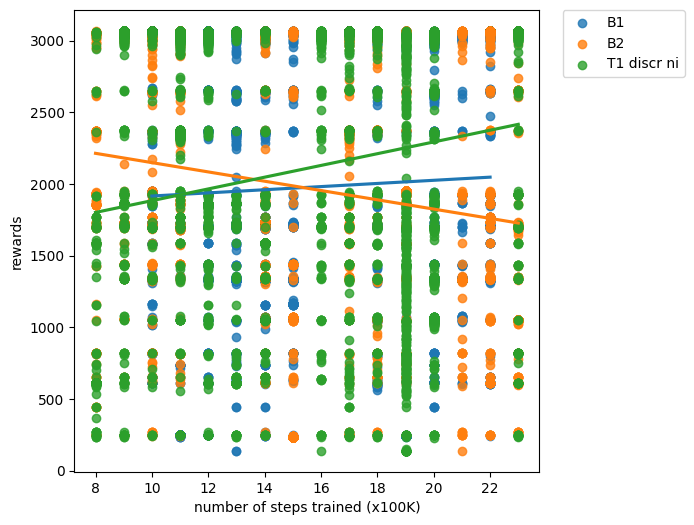

In [36]:
fig_reward, ax_reward = plt.subplots(figsize=(6, 6))
sns.regplot(x='bin', y='reward', data=df_B1, fit_reg=True, ci=None, ax=ax_reward, label='B1')
sns.regplot(x='bin', y='reward', data=df_B2, fit_reg=True, ci=None, ax=ax_reward, label='B2')
sns.regplot(x='bin', y='reward', data=df_T1, fit_reg=True, ci=None, ax=ax_reward, label='T1 discr ni')
ax_reward.set(ylabel='rewards', xlabel='number of steps trained (x100K)')
ax_reward.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# create a histogram of the rewards. We expect this to match the nasty points in the game.

<Axes: xlabel='reward', ylabel='Count'>

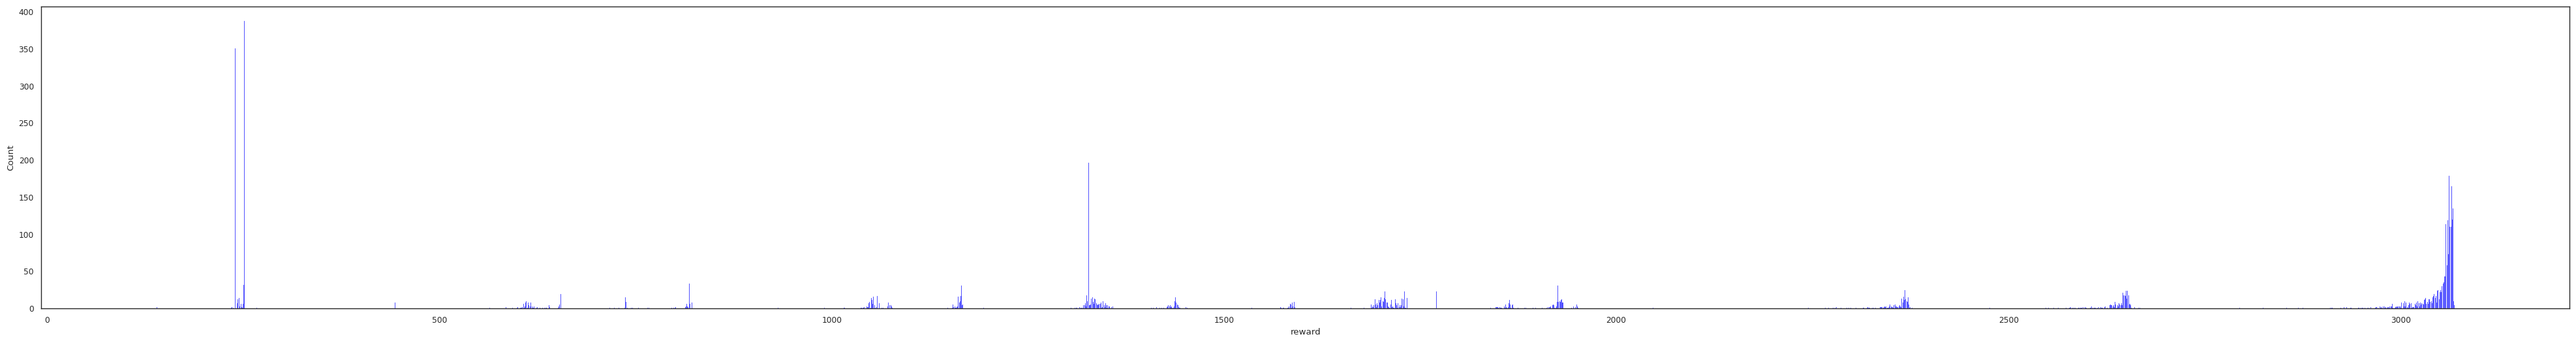

In [196]:
plt.figure(figsize=(50, 6))
sns.histplot(data=df_B1, x='reward', bins=3500, color='blue')